<a href="https://colab.research.google.com/github/siri2511/Speech-Processing/blob/main/CrossCorrelation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-f6a4333b7dd2>:7: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, data = wavfile.read(filename)


Sample Rate 1: 44100
Sample Rate 2: 44100
Signal 1 Shape: (262094,)
Signal 2 Shape: (659456,)
Cross-correlation Result Shape: (460775,)


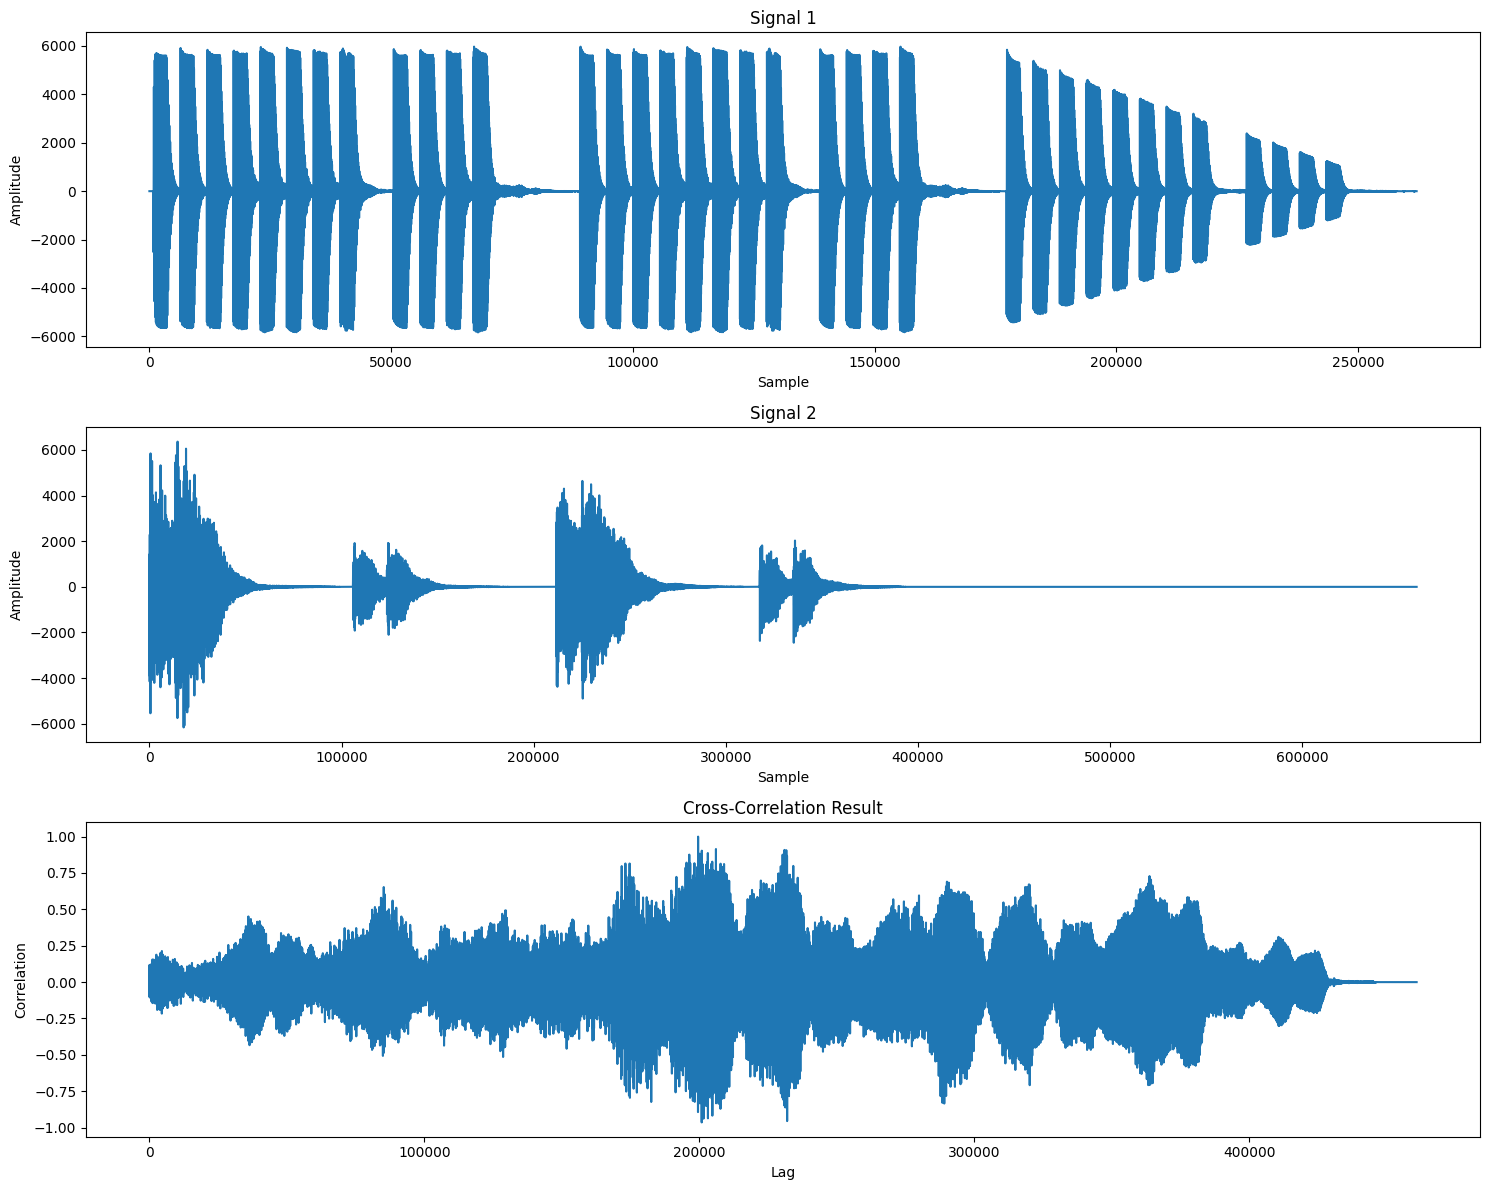

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

def load_audio(filename):
    """Load an audio file and convert to mono if necessary."""
    sample_rate, data = wavfile.read(filename)
    if data.ndim > 1:
        # If stereo, convert to mono by averaging the channels
        data = np.mean(data, axis=1)
    return sample_rate, data

def compute_cross_correlation(signal1, signal2):
    """Compute the cross-correlation between two signals."""
    # Normalize the signals
    signal1 = signal1 - np.mean(signal1)
    signal2 = signal2 - np.mean(signal2)

    # Compute the cross-correlation
    correlation = np.correlate(signal1, signal2, mode='full')

    # Normalize the correlation
    correlation /= np.max(correlation)

    # Remove the negative lags
    mid = len(correlation) // 2
    return correlation[mid:]

def plot_signals(signal1, signal2, cross_correlation):
    """Plot the two signals and their cross-correlation."""
    plt.figure(figsize=(15, 12))

    plt.subplot(3, 1, 1)
    plt.plot(signal1)
    plt.title('Signal 1')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')

    plt.subplot(3, 1, 2)
    plt.plot(signal2)
    plt.title('Signal 2')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')

    plt.subplot(3, 1, 3)
    plt.plot(cross_correlation)
    plt.title('Cross-Correlation Result')
    plt.xlabel('Lag')
    plt.ylabel('Correlation')

    plt.tight_layout()
    plt.show()

def main():
    # Load the two speech signals
    sample_rate1, signal1 = load_audio('/content/example_WAV.wav')
    sample_rate2, signal2 = load_audio('/content/example_2.wav')

    # Debugging output
    print(f"Sample Rate 1: {sample_rate1}")
    print(f"Sample Rate 2: {sample_rate2}")
    print(f"Signal 1 Shape: {signal1.shape}")
    print(f"Signal 2 Shape: {signal2.shape}")

    # Compute the cross-correlation
    cross_correlation = compute_cross_correlation(signal1, signal2)

    # Debugging output
    print(f"Cross-correlation Result Shape: {cross_correlation.shape}")

    # Plot the results
    plot_signals(signal1, signal2, cross_correlation)

if __name__ == "__main__":
    main()
